In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [11]:
df = pd.read_csv("C://Users/Admin/Desktop/000-data_science/sem2 - business intelligence/alternative assessment/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


C:\Users\Admin\AppData\Local\Temp\ipykernel_21352\2715740118.py:11: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, col] = lbl.fit_transform(df.loc[:, col])


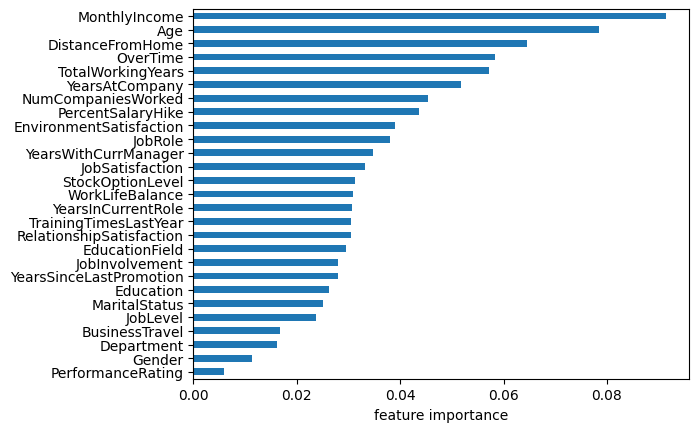

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

def label_encode(df_in):

    df = df_in.copy()

    for col in df.select_dtypes('object').columns:
        lbl = LabelEncoder()
        df.loc[:, col] = lbl.fit_transform(df.loc[:, col])

    return df

df_enc = label_encode(df)
drop_col = ['Attrition', 'DailyRate', 'HourlyRate', 'MonthlyRate', 'Over18', 'StandardHours', 'EmployeeCount', 'EmployeeNumber']
clf = RandomForestClassifier(random_state = 42)
def classify(df_in, clf, drop_col):

    '''
    classify and get feature importance
    '''
    X_full = df_in.drop(drop_col, axis=1)
    y_full = df_in.Attrition

    # get roc-auc score to validify the use of this existing set of features
    clf.fit(X_full, y_full)
    f1 = cross_val_score(clf, X_full, y_full, scoring = "roc_auc", cv=5).mean() # f1 is used as metric due to class imbalace

    # extract feature importance
    coef = pd.Series(clf.feature_importances_, index = X_full.columns).sort_values(ascending=False)

    return f1, coef, clf

df_score, coef, cl = classify(df_enc, clf, drop_col)

coef.sort_values(ascending=True).plot(kind='barh')
plt.xlabel("feature importance")

plt.show()

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
train, test = train_test_split(df, test_size=0.2, stratify = df['Attrition'])

In [ ]:
test.to_csv("test_data.csv")

In [39]:
train_enc = label_encode(train)
test_enc = label_encode(test)
df_score, coef, model = classify(train_enc, clf, drop_col)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21352\2715740118.py:11: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, col] = lbl.fit_transform(df.loc[:, col])


In [44]:
import joblib

joblib.dump(model, 'pred_model.pkf', compress=1)

['pred_model.pkf']

In [45]:
xx = joblib.load('pred_model.pkf')

In [47]:
# 'dataset' holds the input data for this script
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

def label_encode(df_in):

    df = df_in.copy()

    for col in df.select_dtypes('object').columns:
        lbl = LabelEncoder()
        df.loc[:, col] = lbl.fit_transform(df.loc[:, col])

    return df

df_enc = label_encode(df)

def kf_split(df):
    # creaete kfold column and initialize with -1
    df['kfold'] = -1

    # initiate kfold class from model selection module
    kf = StratifiedKFold(n_splits=5)

    # fill the new kfold column
    for fold, (train_, valid_) in enumerate(kf.split(X=df.drop('Attrition', axis=1), y = df.Attrition)):
        df.loc[valid_, 'kfold'] = fold
        
    return df

df_train = kf_split(df_enc)


def predict_kfold(df, clf):
    df['predict_proba'] = -1
    df['prediction'] = -1
    Xtr = df.drop('Attrition', axis=1)
    y = df.Attrition

    for i in range(5):

            X_tr = Xtr[Xtr['kfold'] != i].drop(['kfold'], axis=1)
            y_tr = y[Xtr['kfold'] != i]
            X_val = Xtr[Xtr['kfold'] == i].drop(['kfold'], axis=1)
            y_val = y[Xtr['kfold'] == i]
            
            clf.fit(X_tr, y_tr)
            df.loc[X_val.index, 'predict_proba'] = clf.predict_proba(X_val)[:,1]
            df.loc[X_val.index, 'prediction'] = clf.predict(X_val)

    return df


df_ = predict_kfold(df_train, clf)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21352\2521006435.py:17: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, col] = lbl.fit_transform(df.loc[:, col])


In [41]:
clf = RandomForestClassifier(random_state = 42)

In [43]:
def predict_(df, clf):
    df['predict_proba'] = -1
    df['prediction'] = -1
    Xtr = df.drop('Attrition', axis=1)
    y = df.Attrition

    for i in range(5):

            X_tr = Xtr[Xtr['kfold'] != i].drop(['kfold'], axis=1)
            y_tr = y[Xtr['kfold'] != i]
            X_val = Xtr[Xtr['kfold'] == i].drop(['kfold'], axis=1)
            y_val = y[Xtr['kfold'] == i]
            
            clf.fit(X_tr, y_tr)
            df.loc[X_val.index, 'predict_proba'] = clf.predict_proba(X_val)[:,1]
            df.loc[X_val.index, 'prediction'] = clf.predict(X_val)

    return df


df_ = predict_(df_train, clf)
    